# <center>📈<font color=#D2691E>**Yes Bank Stock Closing Price Prediction**</font>📉</center>
---

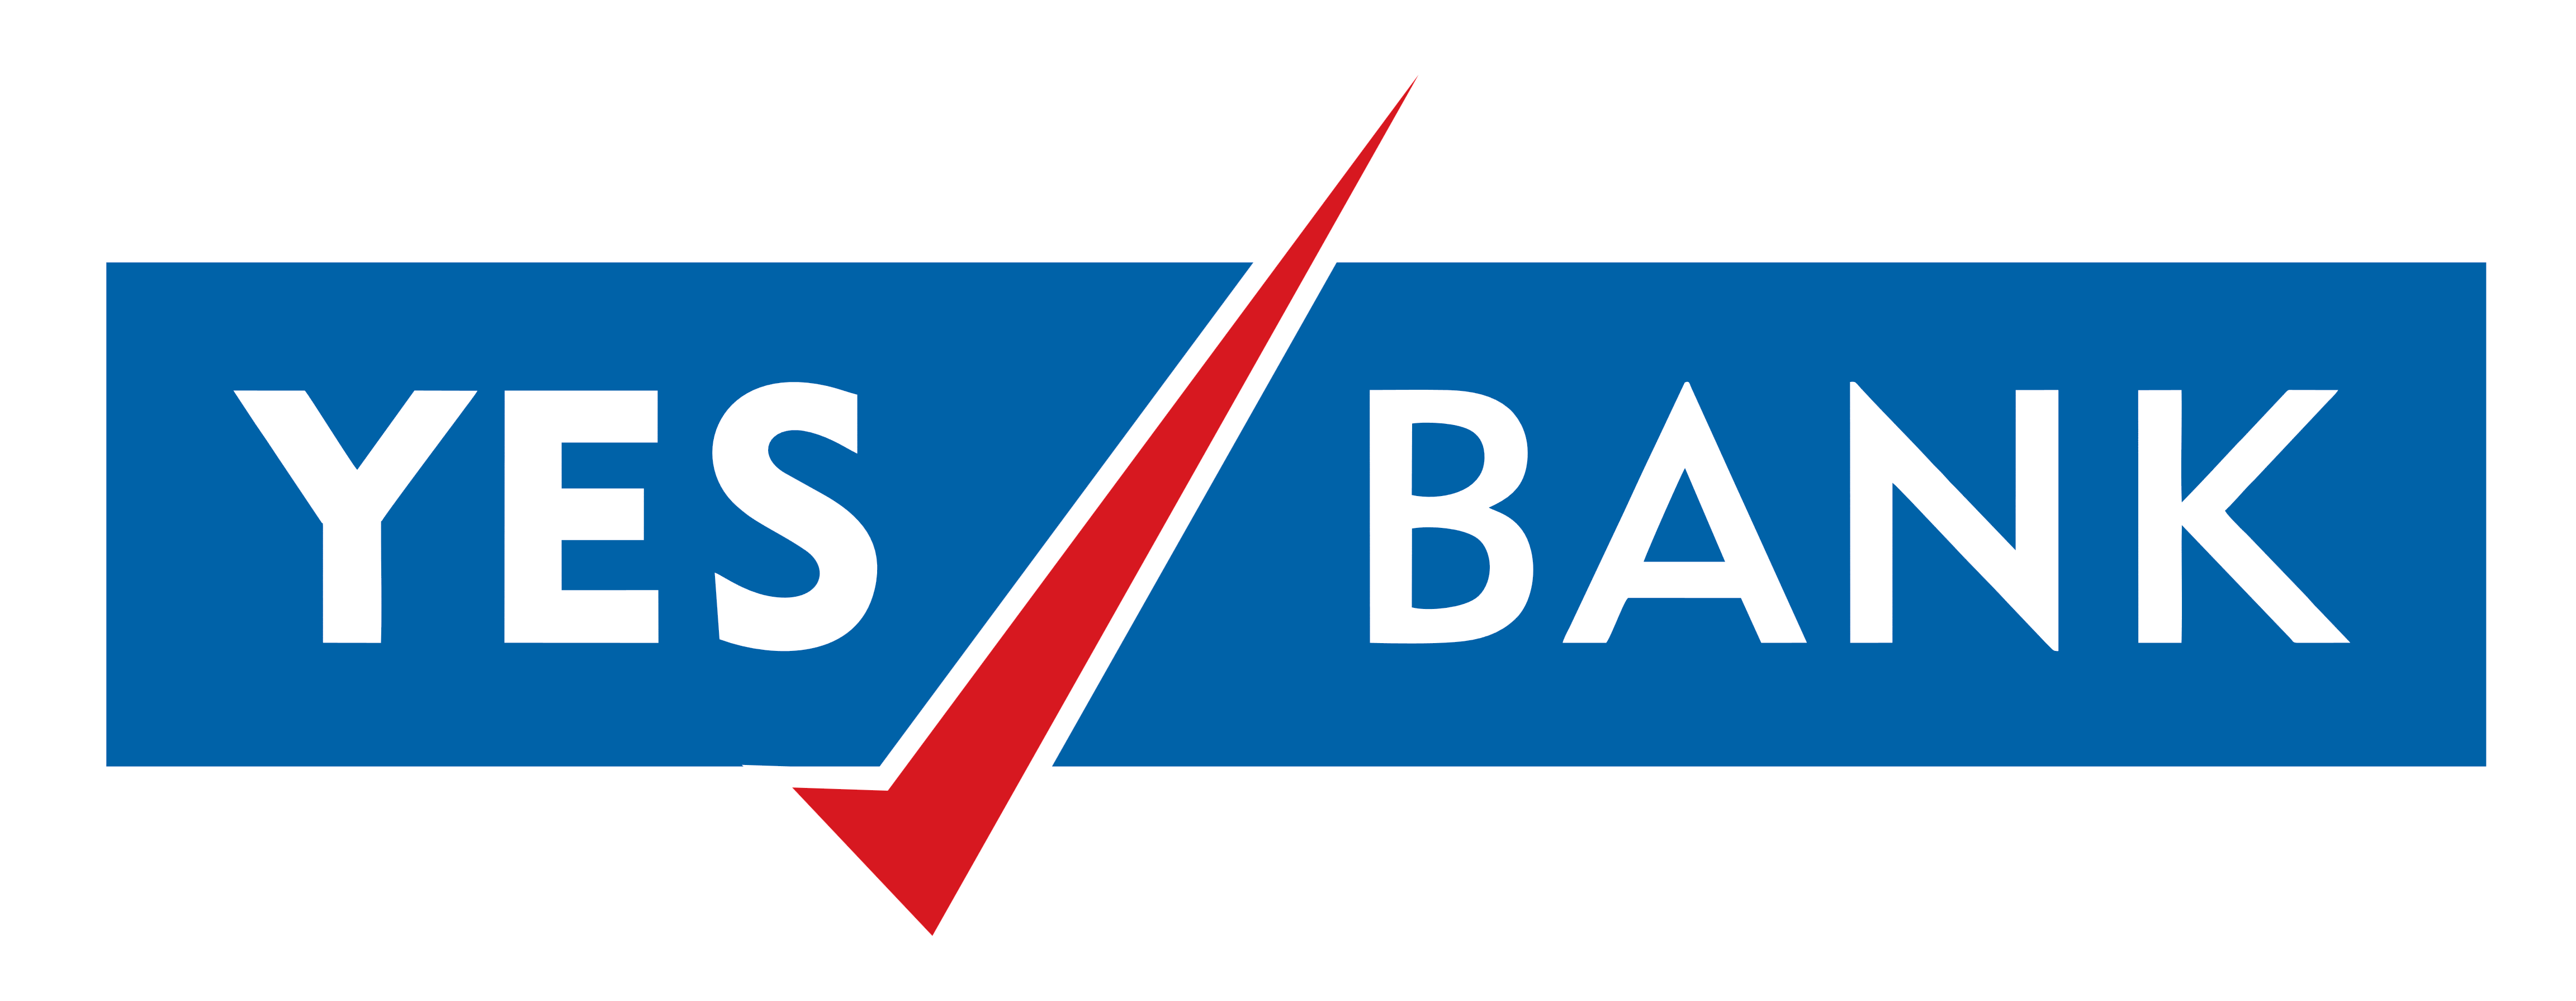




---
## **<u>About the Project :</u>**  [**`Yes Bank`**](https://www.yesbank.in/) is a well-known bank in the Indian financial domain. ***Since 2018***, *it has been in the news because of the [`fraud case`](https://www.ndtv.com/india-news/yes-bank-fraud-rs-5-000-crore-fraud-by-yes-banks-rana-kapoor-wadhawans-probe-agency-2913012) involving [`Rana Kapoor.`](https://en.wikipedia.org/wiki/Rana_Kapoor)* Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# <center>**Let's First make Understanding of the [Stock Market](https://www.investopedia.com/articles/investing/082614/how-stock-market-works.asp)**</center>


> **Stock Market :** The term stock market refers to several exchanges in which shares of publicly held companies are bought and sold. Such financial activities are conducted through formal exchanges and via over-the-counter (OTC) marketplaces that operate under a defined set of regulations. 

* Both ***stock market*** and ***stock exchange*** are often used interchangeably. Traders in the stock market buy or sell shares on one or more of the stock exchanges that are part of the overall stock market.
## **<u>KEY TAKEAWAYS</u>**
* Stock markets are venues where buyers and sellers meet to exchange equity shares of public corporations.
* Stock markets are components of a free-market economy because they enable democratized access to investor trading and exchange of capital.
* Stock markets create efficient price discovery and efficient dealing.














In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **Importing and Loading data**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
path = "/content/drive/MyDrive/Capstone Project/Regression/data_YesBank_StockPrices.csv"

dataset = pd.read_csv(path)

In [ ]:
df = dataset.copy()

## **Data Exploration**

In [ ]:
#number of rows and columns 
df.shape

(185, 5)

* This Dataset has 185 observations in it with 5 columns(features)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Here showing in Dataset the First Five rows by using head() method 
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB




-  There are multiple variable in the dataset - Date, Open, High and close The columns Open and Close represent the starting and final price.
- The High, Low variable are represent the maximum and minimum.




In [ ]:
#description of the data in the dataset
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### **Since, we've seen the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:**

>**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

>**High** - The high is the highest price at which a stock traded during a period.

>**Low** -The low is the highest price at which a stock traded during a period.

>**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

# **Data Wrangling**


> Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


## Objectives:
*   Handle missing values
*   Correct data format
*   Standardize and normalize data


In [ ]:
#Looking for missing values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64



> No missing values in dataset. Here our dataset in no nan values



In [ ]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0



>Do not have any duplicates in dataset 



<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [ ]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
df['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

<h3>The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.</h3>

Since, Date column has dtype as object we've to convert it into datetime format

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date 
 
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
#check dtype of date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB




>Now Format and data type of date feature has changed into datetime.



<h2><b>Checking the Outlier</b></h2>

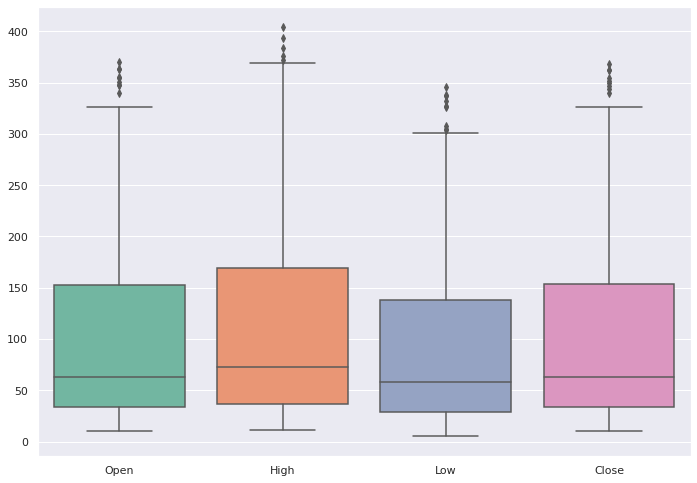

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=df, orient="v", palette="Set2")



> Data Wrangling finished. Dataset is clean and ready for exploratory data analysis



<center><h1><b>EDA :</b>Exploratory Data Analysis</h1></center>

<h3>Visualising the data</h3>

[Text(0.5, 1.0, 'Yes Bank closing price'), Text(0.5, 0, 'Year')]

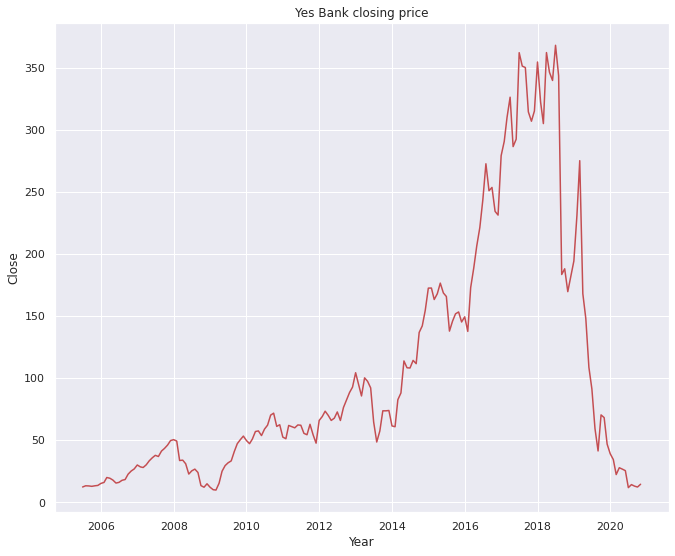

In [ ]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11,9)})
sns.lineplot(x="Date", y="Close",data=df,color='r').set(title='Yes Bank closing price',xlabel='Year')



*   Now, We can easly see in above plot **the trend is increasing from 2009 to 2018** but after that the trend decreases. This is because of the fraud case of involving ***Rana Kapoor.***



<h2>The main objective is to predict the stock’s closing price, I will take close price as dependent variable(Target variable)</h2>

<h3><b>Dependent variable of close price of stock

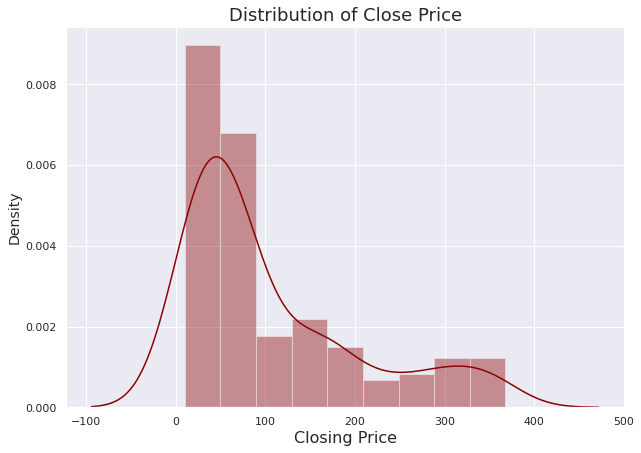

In [ ]:
# depndent variable is 'Close'
# Normal Distribution
plt.figure(figsize = (10,7))
sns.distplot(df['Close'], color = 'darkred',kde=True)
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

>It is Right Skewed Distirbution



<h4>Applying <b>log transformation</b> to make it <b>normal distribution.</b>

> The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.





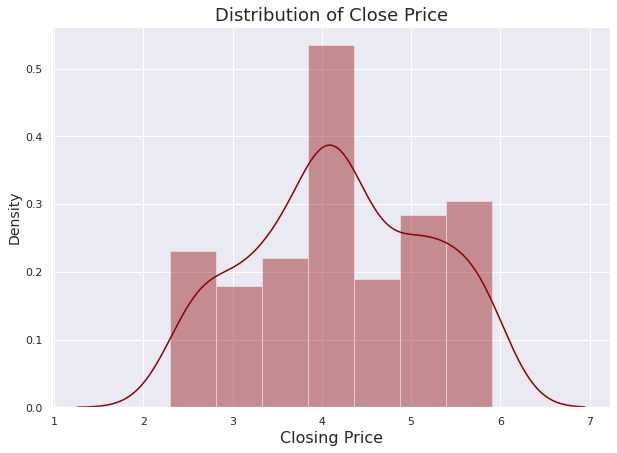

In [ ]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (10,7))
sns.distplot(np.log(df['Close']), color = 'darkred')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

*  Now, distribution of closing price is more normal, after applying log transformation

<h3><b>Independent Variables Open , High and Low price of stock</b></h3>

* **Plotting distribution** of Open , High and Low numerical Features

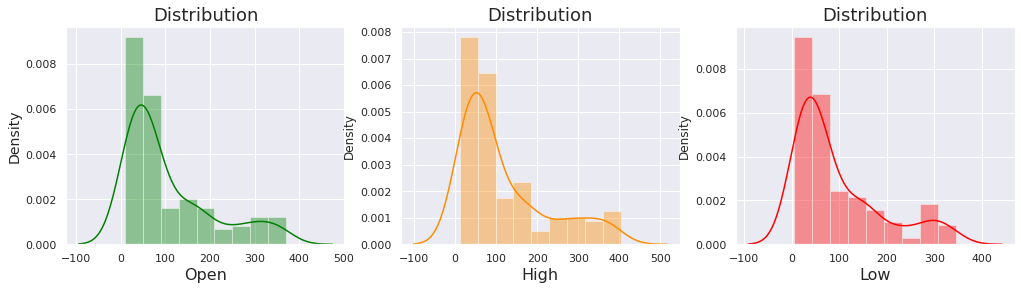

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(df['Open'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(df['High'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(df['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()


* It's looking like **rightly skewed** for all features.

<h4>Again applying <b>log transformation</b> to make it <b>normal distribution.</b>

> The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.





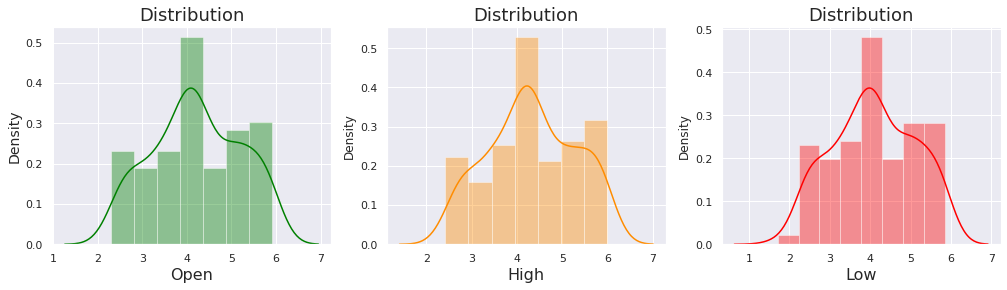

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(df['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(df['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(np.log(df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

* Now, It looks like **Normally Distributed** of ***Open, High*** and ***Low*** Feature.

<h3><b>Now find out the realation between the Dependent Variable and independent Variable</b></h3>

* scatter plot with Best Fit line

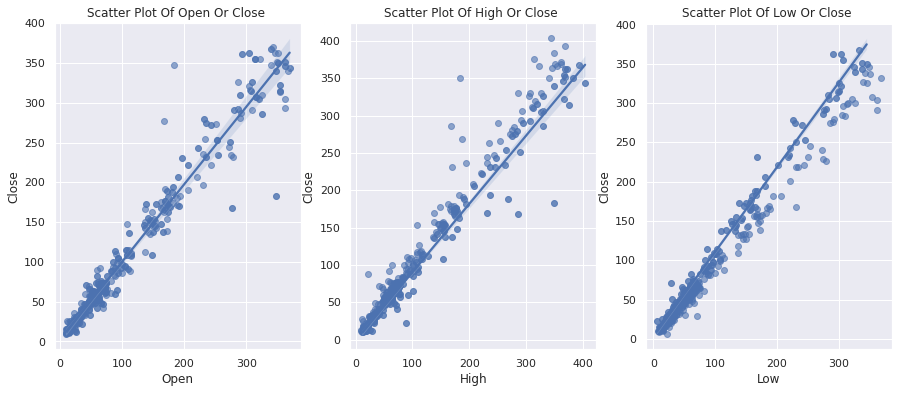

In [ ]:
plt.figure(figsize = (15,6))

plt.subplot(1, 3, 1)
plt.scatter(df['Close'], df['Open'], alpha=0.6)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)

plt.subplot(1, 3, 2)
plt.scatter(df['Close'], df['High'], alpha=0.6)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)

plt.subplot(1, 3, 3)
plt.scatter(df['Close'], df['Low'], alpha=0.6)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)

plt.show()

<h1><b> Correlation

* <h3>Now, we will see the correlation between all the features in our data set

<AxesSubplot:>

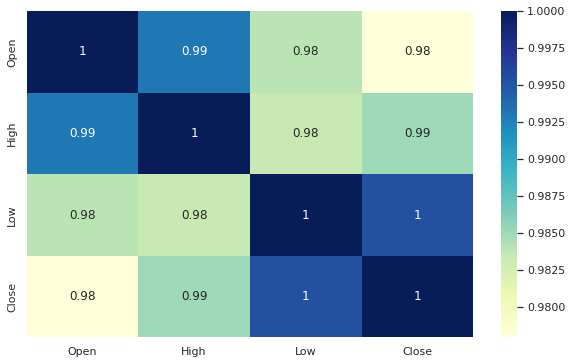

In [ ]:
# let's find all feature's correlation with Heatmap
# correlation
plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

Now, All variables are showimg the highest correlation among them

<h1>Variance Inflation Factor (VIF) values of Independent Variables.

>**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.



In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values

* We have the very High VIF of Open, High, Low features in our dataset so we have to drop them which is least correlated with dependent variable

In [ ]:
# Here we will drop the open feature from the VIF matrix
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


* After drop the open feature from the VIF matrix

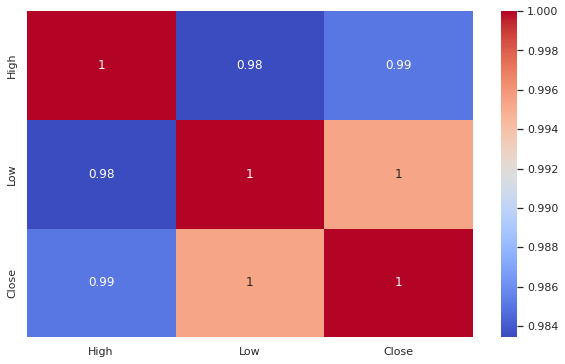

In [ ]:
# Correaltion of heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df[['High','Low','Close']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

---
<center><h1><b>Model Development</b></h1></center>

---

* A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

---
# **Train Test Split**
---

Splitting Data

X = Independent Variable

y = Dependent Variable

In [ ]:
# Splitting our data into Dependent and Independent Variables

X = df.drop(columns=['Close','Date'])
y = df['Close']

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the X_train dataset : (148, 3)
Shape of the X_test dataset : (37, 3)
Shape of the y_train dataset : (148,)
Shape of the y_test dataset : (37,)


<h1><b> We will build these regression models for our data.</b>

1. Linear Regression
2. Ridge Rigression
3. Lasso Rigression
4. Elastic Net Regression
5. XG Boost Regrression
* <h4>By using <b>Cross-Validation</b>, we will able to get more metrics and draw important conclusion both about our algorithm and our data.</h4>

---
#<b>📍Implementing Linear Regression</b>
---
>Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

* You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.
* The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.
---

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 2)

0.81

In [ ]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 2)

0.82

In [ ]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [ ]:
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


In [ ]:
# Test Performance of Linear Regregression

print("MSE value :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE value :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 score :", round(r2_score(y_test, y_pred),4))

MSE value : 0.0316
RMSE value : 0.1777
MAE value : 0.1513
MAPE value : 0.0954
r2 score : 0.8226


Text(0, 0.5, 'Predicted test value')

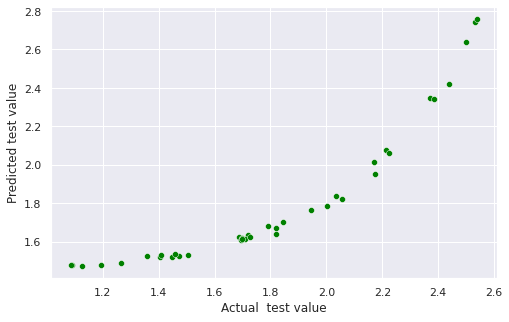

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred,color='green')
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

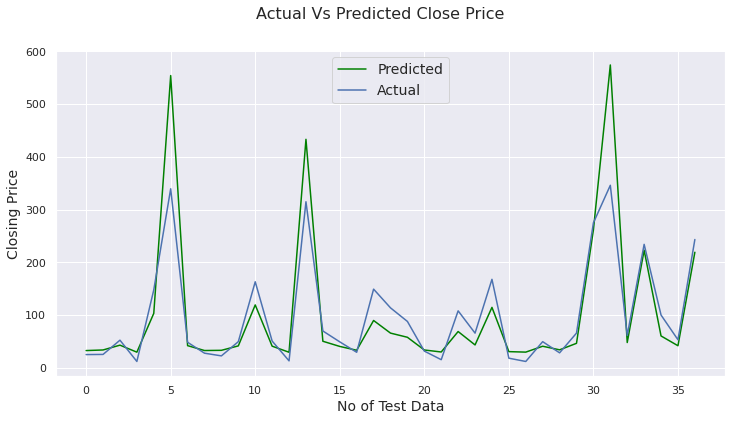

In [ ]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(y_pred),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize =16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

---
#<b>Ridge and Lasso Regression</b>

---
* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function
---

---
#<b>📍Implementing Ridge Regression</b>

---
<h2><b><u>Ridge Regression:</u></b></h2>
<p style="text-align: justify;">As mentioned before, ridge regression performs &#8216;<strong>L2 regularization</strong>&#8216;, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:</p>
<h4>Objective = RSS + α * (sum of square of coefficients)</h4>
<p style="text-align: justify;">Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:</p>
<ol>
<li><strong>α = 0:</strong>
<ul>
<li>The objective becomes same as simple linear regression.</li>
<li>We&#8217;ll get the same coefficients as simple linear regression.</li>
</ul>
</li>
<li><strong>α = ∞:</strong>
<ul>
<li>The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.</li>
</ul>
</li>
<li><strong>0 &lt; α &lt; ∞:</strong>
<ul>
<li>The magnitude of α will decide the weightage given to different parts of objective.</li>
<li>The coefficients will be somewhere between 0 and ones for simple linear regression.</li>
</ul>
</li>
</ol>
<p style="text-align: justify;">I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We&#8217;ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.</p>

---


In [ ]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 2)

0.81

In [ ]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge), 4))

MSE score: 0.0317
RMSE score: 0.1779
MAE score: 0.1514
MAPE score: 0.0955
R2 score: 0.8221


Text(0, 0.5, 'Predicted Value')

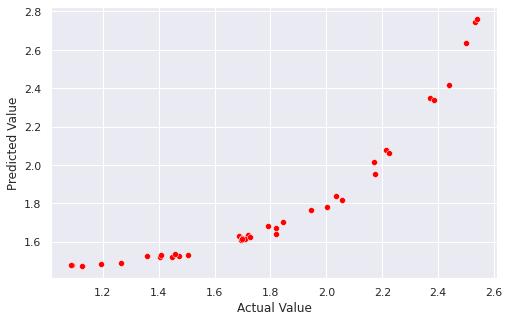

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test,y_pred_ridge,color='red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

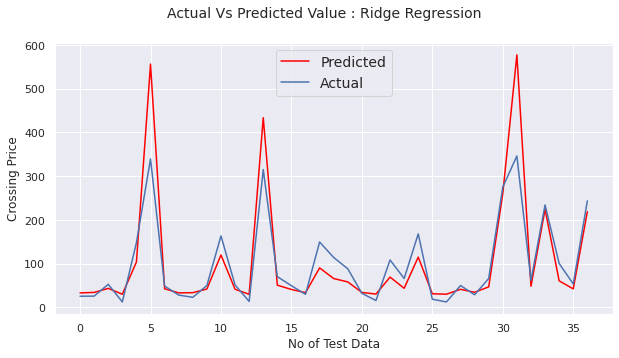

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Ridge Regression', fontsize= 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Crossing Price', fontsize= 12)
plt.grid(True)

---
#<b>📈Implementing Cross Validation Of Ridge</b>

---
**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation techniques.

In [ ]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [ ]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative MSE(mean squared error) score is : -0.035


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge1), 2))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge1), 4))

MSE score: 0.0325
RMSE score: 0.1804
MAE score: 0.15
MAPE score: 0.0968
R2 score: 0.8172


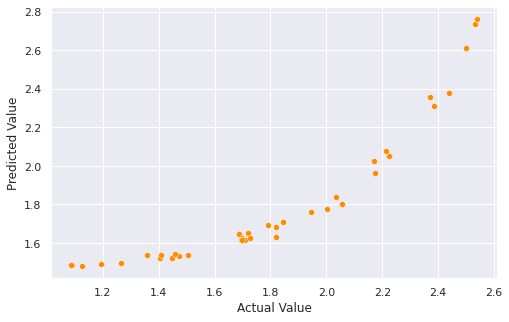

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test), (y_pred_ridge1),color='darkorange')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

**Ridge Predication vs Actual (After Cross-Validation)**

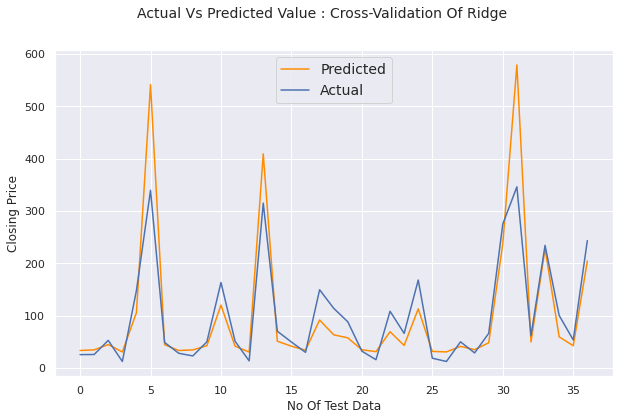

In [ ]:
# actual Price Vs Predicted Price for ridge regression
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,6))
plt.plot(predicted,color='darkorange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True)

---
# **📍Implementing Lasso Regression**
---
<h2><b><u>Lasso Regression</u></b></h2>
<p style="text-align: justify;">LASSO stands for <em>Least Absolute Shrinkage and Selection Operator</em>. I know it doesn&#8217;t give much of an idea but there are 2 key words here &#8211; &#8216;<em>absolute</em>&#8216; and &#8216;<em>selection</em>&#8216;.</p>
<p>Lets consider the former first and worry about the latter later.</p>
<p style="text-align: justify;">Lasso regression performs <strong>L1 regularization</strong>, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:</p>
<h4>Objective = RSS + α * (sum of absolute value of coefficients)</h4>
<p style="text-align: justify;">Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:</p>
<ol>
<li>α = 0: Same coefficients as simple linear regression</li>
<li>α = ∞: All coefficients zero (same logic as before)</li>
<li>0 &lt; α &lt; ∞: coefficients between 0 and that of simple linear regression</li>
</ol>
<p style="text-align: justify;">Yes its <em>appearing to be very similar to Ridge till now</em>. But just hang on with me and you&#8217;ll know the difference by the time we finish.</p>


In [ ]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.005, max_iter = 3000)
lasso1.fit(X_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
# Accuracy of lasso regression model
round(lasso1.score(X_train, y_train), 4)

0.8144

In [ ]:
# prediction of train data
y_pred_lasso = lasso1.predict(X_test)

In [ ]:
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


Text(0, 0.5, 'Predicted Value')

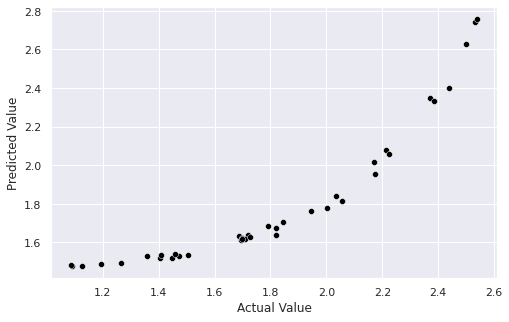

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred_lasso,color='black')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

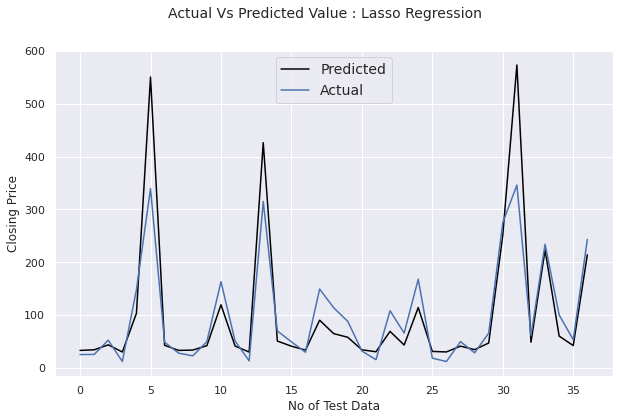

In [ ]:
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(y_pred_lasso),color='black')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Lasso Regression', fontsize = 14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid(True)

---
# **📈Implemeting Cross Validation of Lasso**
---
**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation techniques.
---

In [ ]:
# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train) 


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


Text(0, 0.5, 'Predicted Value')

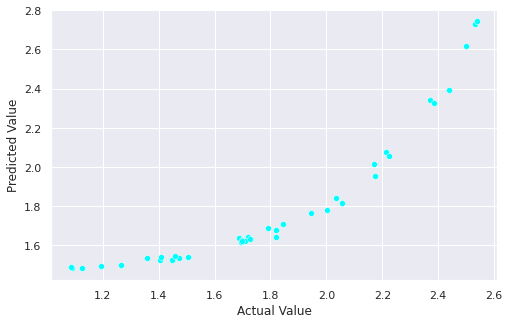

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_lasso1),color='aqua')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

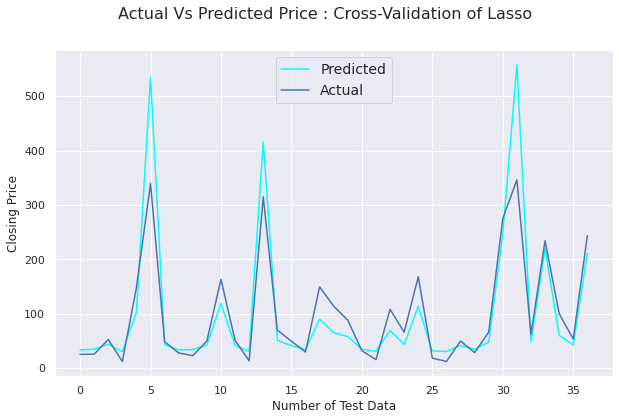

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1),color='aqua')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid(True)

---
# **📍Implementing Elastic Net Regression**
---
**Elastic Net** is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

---

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elastic_reg.score(X_train,y_train)

0.7958095661377872

In [ ]:
y_elastic_pred = elastic_reg.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_elastic_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_elastic_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_elastic_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_elastic_pred),4))
print("R2 :",round(r2_score(y_test, y_elastic_pred), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


Text(0, 0.5, 'Predicted Value')

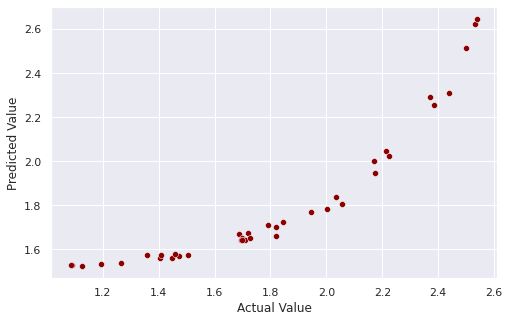

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_elastic_pred),color= 'darkred')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

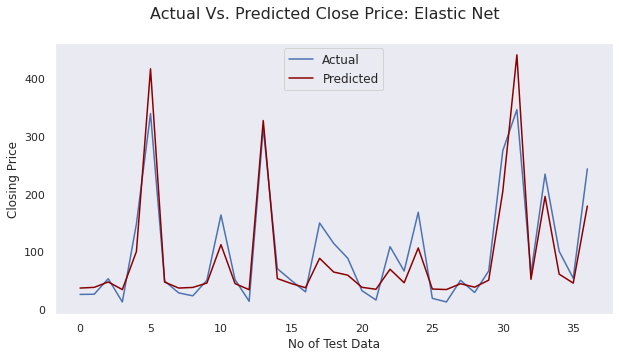

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred),color='darkred')
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

---
# **📈Implementing Cross Validation of Elastic Net**
---
**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation techniques.

---

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


Text(0, 0.5, 'Predicted Value')

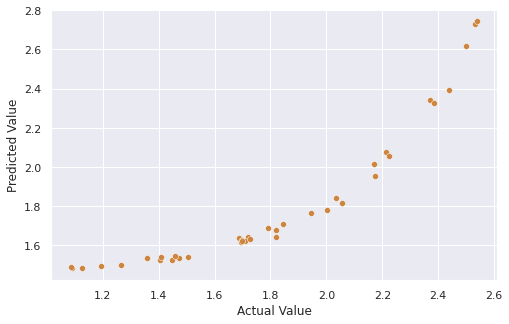

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='peru')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

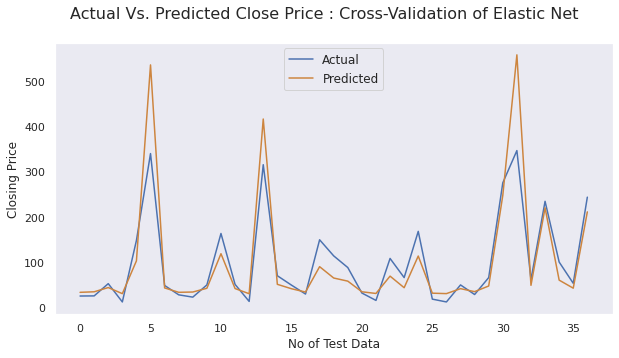

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1),color='peru')
plt.suptitle('Actual Vs. Predicted Close Price : Cross-Validation of Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

---
# **📍Implementing XG Boost Regression**
---
**XGBoost** is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

>XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.


In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_train,y_train)

0.9999793046487826

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3392187, 1.4758207, 1.748508 , 1.1662616, 2.1395898, 2.5142817,
       1.6815532, 1.4059161, 1.481916 , 1.7062517, 2.2304559, 1.6739156,
       1.0959644, 2.5049477, 1.8495944, 1.7007504, 1.435145 , 2.1372025,
       2.0201871, 1.9451874, 1.4812558, 1.1896846, 2.0359929, 1.7063808,
       2.2294648, 1.2862344, 1.1662616, 1.7025944, 1.4811883, 1.7835379,
       2.4367232, 2.53591  , 1.8465369, 2.3564181, 1.9621443, 1.7753245,
       2.3714423], dtype=float32)

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0019
RMSE : 0.0433
MAE : 0.0314
MAPE : 0.0205
R2 : 0.9894


Text(0, 0.5, 'Predicted Value')

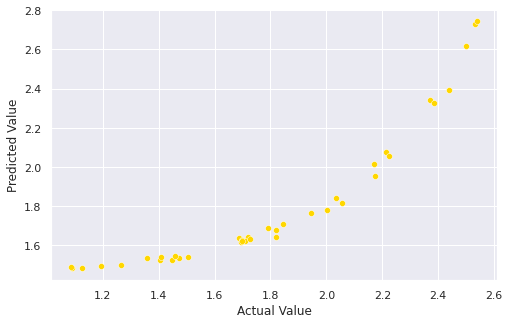

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

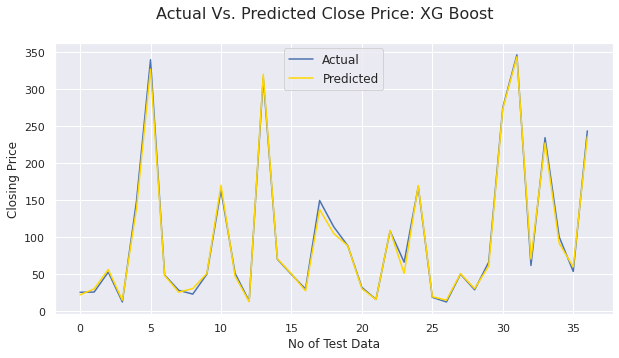

In [ ]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG),color='gold')
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

# Final View Point

In [ ]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [ ]:
models=[regressor,ridge,lasso1,elastic_reg,xgb]

In [ ]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
4,XGBRegressor,0.031,0.002,0.043,2.048,0.989
0,LinearRegression,0.151,0.032,0.178,9.543,0.823
1,Ridge,0.152,0.032,0.179,9.580,0.820
2,Lasso,0.152,0.032,0.179,9.623,0.820
3,ElasticNet,0.157,0.036,0.191,10.240,0.796


# **Conclusion**

1. The popularity of stock closing is growing extremely rapidly day by day   which encourage researcher to find new methods if any fraud happens.

2. This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

4. High, low, open are directly correlate with the closing price of stocks

5. Target variable(dependent variable) strongly dependent on independent variables

6. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction

